/tmp/ipykernel_11540/218529590.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"], errors="coerce")


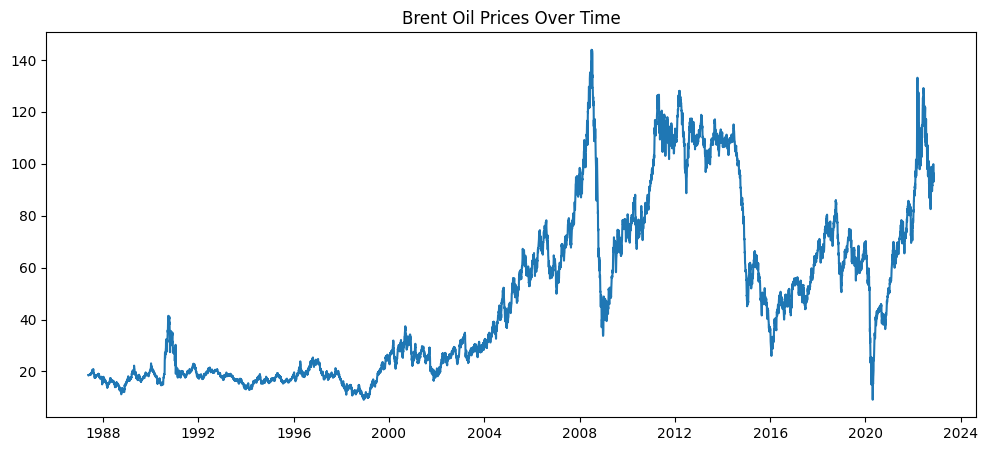

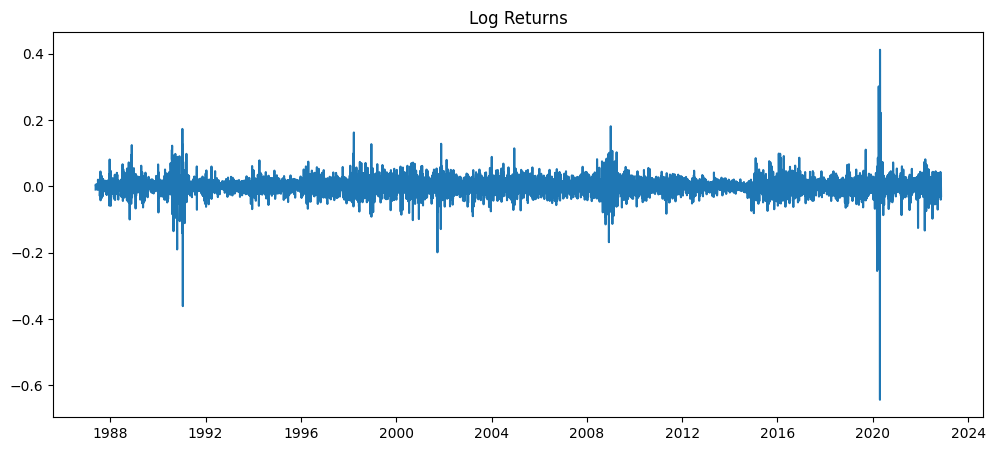

ADF Statistic: -16.427113494485962
p-value: 2.4985801611426027e-29


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

df = pd.read_csv("../data/raw/BrentOilPrices.csv")
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df = df.sort_values("Date")

plt.figure(figsize=(12,5))
plt.plot(df["Date"], df["Price"])
plt.title("Brent Oil Prices Over Time")
plt.show()

df["log_return"] = (df["Price"].apply(lambda x: np.log(x))).diff().dropna()

plt.figure(figsize=(12,5))
plt.plot(df["Date"][1:], df["log_return"][1:])
plt.title("Log Returns")
plt.show()

adf_result = adfuller(df["log_return"].dropna())
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
